# HathiTrust Research Center (HTRC)

The [HathiTrust Digital Library](https://www.hathitrust.org/) contains over 14 million volumes scanned from academic libraries around the world (primarily in North America). The [HathiTrust Research Center](https://analytics.hathitrust.org/) allows researchers to access almost all of those texts in a few different modes for computational text analysis. 

This notebook will walk us through getting set-up to analyze [HTRC Extracted Features](https://wiki.htrc.illinois.edu/display/COM/Extracted+Features+Dataset) for volumes in HathiTrust in a Jupyter/Python environment. *Extracted Features* are currently (as of August 2017) the most robust way to access in-copyright works from the HT Library for computational analysis. 

For more information on HTRC: 
* [Library text mining guide page on HTRC](http://guides.lib.berkeley.edu/c.php?g=491766&p=3381443)
* [Programming Historian's Text Mining in Python through the HTRC Feature Reader](http://programminghistorian.org/lessons/text-mining-with-extracted-features)

## Installation

To start we'll need to install a few things:
* Install the *HTRC Feature Reader* to work with Extracted Features: 

In [1]:
%%capture
!pip install htrc-feature-reader
import os
from htrc_features import FeatureReader
from datascience import *
import pandas as pd
%matplotlib inline

## Adding volumes from HathiTrust

To build your own corpus, you first need to find the volumes you'd like to include in the [HathiTrust Library](https://www.hathitrust.org/). Alternately, you can access volumes from existing [public HT collections](https://babel.hathitrust.org/cgi/mb?colltype=featured), or use one of the sample datasets included below under the *Sample datasets* heading. To access extracted features from HathiTrust:

* Install and configure [the HT + HTRC mashup](https://data.analytics.hathitrust.org/features/) browser extension.
* Once the extension is running, go to the [HathiTrust Library](https://www.hathitrust.org/), and search for the titles you want to include.
* You can manually download extracted features one result at a time by simply choosing the *Download Extracted Features* link for any item in your search results. Save the .json.bz2 file or files and skip to the next section, *Working with Extracted Features* below to load them into your workspace.
* If you plan to work with a large number of texts, you might choose instead to create a collection in HathiTrust, and then download the Extracted Features for the entire collection at once. This requires a valid CalNet ID. 

### To create a collection:

* [Login to HathiTrust](https://www.hathitrust.org/shibboleth)
* Change the HathiTrust search tab to *Full-Text* or go to the [Advanced Full-Text search](https://babel.hathitrust.org/cgi/ls?a=page;page=advanced).
![image](img/ht-full-text.png)
* Check the boxes to the left of any search results you want to add to your collection (or select all), and use the *Select Collection* dropdown to *Add Selected* volumes to collections of your own design.
![image](img/judith-butler-ht.png)
![image](img/ht-add-selected.png)
* Choose *My Collections* from the top of the HathiTrust interface, choose your collection, and from the *Download Metadata* button/dropdown choose the TSV option.
![image](img/ht-json.png)
* Open the TSV file, and then delete all of the columns except for the first column, *htitem_id.* Delete the *htitem_id* header row as well and then save the file to your working directory.

## Loading Extracted Features

Go to the directory where you plan to do your work.

### Add a single volume
If you're planning to analyze only a few volumes you can use the following command, replacing {{volume_id}} with your own:
```
htid2rsync {{volume_id}} | rsync -azv --files-from=- data.sharc.hathitrust.org::features/ local-folder/
```

### Add multiple volumes
If you have a file of volume ids in a .txt file, with one ID per line, use --from-file filename, or just -f filename, and point to a text file with one volume ID on each line.
```
htid2rsync --f volumeids.txt | rsync -azv --files-from=- data.sharc.hathitrust.org::features/ local-folder/
```

### Sample datasets

#### Complete Novels of Jane Austen (1 volume)
```
htid2rsync mdp.39015004788835 | rsync -azv --files-from=- data.sharc.hathitrust.org::features/ local-folder/
```
#### Nigerian Authors (30 volumes)
authors-nigerian.txt includes volume IDs for 30 texts with the Library of Congress subject heading *Authors, Nigerian*. 
```
htid2rsync --f authors-nigerian.txt | rsync -azv --files-from=- data.sharc.hathitrust.org::features/ local-folder/
```

#### San Francisco (Calif.) - History (111 volumes)
sf-history.txt includes the volume ID for 111 texts with the Library of Congress subject heading *San Francisco (Calif.) - History*. 
```
htid2rsync --f sf-history.txt | rsync -azv --files-from=- data.sharc.hathitrust.org::features/ local-folder/
```

#### Congressional Record (1200 volumes)
congressional_record_ids.txt includes the volume ID for every *Congressional Record* volume that HathiTrust could share with us.
```
htid2rsync --f congressional_record_ids.txt | rsync -azv --files-from=- data.sharc.hathitrust.org::features/ local-folder/
```

#### Full 4TB library
It's also possible to work with the entire library (4TB, so beware):
```
rsync -rv data.analytics.hathitrust.org::features/ .
```

Or to use existing lists of public-domain [fiction](http://data.analytics.hathitrust.org/genre/fiction_paths.txt), [drama](http://data.analytics.hathitrust.org/genre/drama_paths.txt), and [poetry](http://data.analytics.hathitrust.org/genre/poetry_paths.txt) (Underwood 2014).

---

# San Francisco History Example
In the example, below, we have five volume IDs on San Francisco history from HathiTrust, which are listed in the file *vol_ids_5.txt.* You can modify the command to include your own list of volume ids or a single volume id of your choosing. (If you choose your own volume/s here, you will also need to modify the filepaths in the next step to point to those files).

In [2]:
!rm -rf local-folder/
!rm -rf local-folder/
!rm -rf data/coo*
!rm -rf data/mdp*
!rm -rf data/uc1*
download_output = !htid2rsync --f data/vol_ids_5.txt | rsync -azv --files-from=- data.sharc.hathitrust.org::features/ data/
download_output

['[sandbox] Welcome to the HathiTrust Research Center rsync server.',
 '',
 'receiving file list ... done',
 'coo/',
 'coo/pairtree_root/',
 'coo/pairtree_root/31/',
 'coo/pairtree_root/31/92/',
 'coo/pairtree_root/31/92/40/',
 'coo/pairtree_root/31/92/40/05/',
 'coo/pairtree_root/31/92/40/05/84/',
 'coo/pairtree_root/31/92/40/05/84/43/',
 'coo/pairtree_root/31/92/40/05/84/43/23/',
 'coo/pairtree_root/31/92/40/05/84/43/23/31924005844323/',
 'coo/pairtree_root/31/92/40/05/84/43/23/31924005844323/coo.31924005844323.json.bz2',
 'mdp/',
 'mdp/pairtree_root/',
 'mdp/pairtree_root/39/',
 'mdp/pairtree_root/39/01/',
 'mdp/pairtree_root/39/01/50/',
 'mdp/pairtree_root/39/01/50/18/',
 'mdp/pairtree_root/39/01/50/18/64/',
 'mdp/pairtree_root/39/01/50/18/64/26/',
 'mdp/pairtree_root/39/01/50/18/64/26/71/',
 'mdp/pairtree_root/39/01/50/18/64/26/71/39015018642671/',
 'mdp/pairtree_root/39/01/50/18/64/26/71/39015018642671/mdp.39015018642671.json.bz2',
 'uc1/',
 'uc1/pairtree_root/',
 'uc1/pairtree_r

### Working with Extracted Features
All of the examples of code below are taken directly, or adapted, from the [Programming Historian tutorial](http://programminghistorian.org/lessons/text-mining-with-extracted-features) or the [FeatureReader's Readme.md file](https://github.com/htrc/htrc-feature-reader).

You'll notice, from the output above, that the content for each volume is stored in a compressed JSON file, in a rather lengthy file directory. We can import and initialize FeatureReader with file paths pointing to those JSON files (using the full paths from the output above). If you chose to work with your own volumes in the previous step you can edit the cell above and re-run the cells below.

First we'll get all the data filepaths from the output of our command above:

In [3]:
suffix = '.json.bz2'
file_paths = ['data/' + path for path in download_output if path.endswith(suffix)]
file_paths

['data/coo/pairtree_root/31/92/40/05/84/43/23/31924005844323/coo.31924005844323.json.bz2',
 'data/mdp/pairtree_root/39/01/50/18/64/26/71/39015018642671/mdp.39015018642671.json.bz2',
 'data/uc1/pairtree_root/32/10/60/00/66/61/20/32106000666120/uc1.32106000666120.json.bz2',
 'data/uc1/pairtree_root/32/10/60/14/02/99/27/32106014029927/uc1.32106014029927.json.bz2',
 'data/uc1/pairtree_root/b3/62/49/67/b3624967/uc1.b3624967.json.bz2']

Now we'll feed these paths into the `FeatureReader` method which will create a `FeatureReader` object:

In [4]:
fr = FeatureReader(file_paths)

We can now cycle through properties of the `FeatureReader`:

In [5]:
for vol in fr.volumes():
    print(vol.id, vol.title, vol.author)
    print()

coo.31924005844323 A history of the city of San Francisco and incidentally of the State of California By John S. Hittell ... ['Hittell, John S. (John Shertzer) 1825-1901 ']

mdp.39015018642671 A cast of hawks : a rowdy tale of greed, violence, scandal, and corruption in the early days of San Francisco / by Milton S. Gould. ['Gould, Milton S. ']

uc1.32106000666120 Early days of San Francisco, California. ['Brown, John Henry 1820-1895 ']

uc1.32106014029927 Fire & gold : the San Francisco story / by Charles A. Fracchia ['Fracchia, Charles A. 1937- ']

uc1.b3624967 Committee of Vigilance: revolution in San Francisco, 1851;an account of the hundred days when certain citizens undertook the suppression of the criminal activities of the Sydney ducks. ['Stewart, George Rippey 1895-1980 ']



Let's try to pull out some more metadata about these titles, using the [Volume object](http://htrc.github.io/htrc-feature-reader/htrc_features/feature_reader.m.html#htrc_features.feature_reader.Volume) in `FeatureReader`. We'll get the HT URL, year, and page count for each volume.

In [6]:
for vol in fr.volumes():
    print("URL: %s Year: %s Page count: %s " % (vol.handle_url, vol.year, vol.page_count))

URL: http://hdl.handle.net/2027/coo.31924005844323 Year: 1878 Page count: 526 
URL: http://hdl.handle.net/2027/mdp.39015018642671 Year: 1985 Page count: 382 
URL: http://hdl.handle.net/2027/uc1.32106000666120 Year: 1949 Page count: 180 
URL: http://hdl.handle.net/2027/uc1.32106014029927 Year: 1994 Page count: 408 
URL: http://hdl.handle.net/2027/uc1.b3624967 Year: 1964 Page count: 352 


The `source_institution` tells us where the volumes were scanned:

In [7]:
for vol in fr.volumes():
    print("Source institution: %s " % (vol.source_institution))

Source institution: COO 
Source institution: MIU 
Source institution: UC 
Source institution: UC 
Source institution: UC 


Let's take a closer look at the first volume:

In [8]:
vol = fr.first()
vol.title

'A history of the city of San Francisco and incidentally of the State of California By John S. Hittell ...'

The `tokens_per_page` method will give us the words in the volume:

In [9]:
tokens = vol.tokens_per_page()
tokens.head()

,count
page,
1,0
2,0
3,0
4,0
5,31


We can easily plot the number of tokens across every page of the book

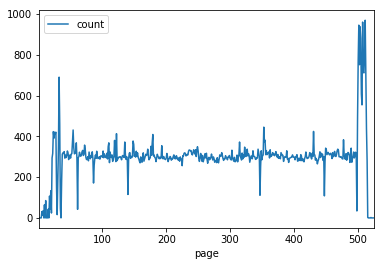

In [10]:
tokens.plot()

Now let's look at some specific pages, using the [Page object in FeatureReader](http://htrc.github.io/htrc-feature-reader/htrc_features/feature_reader.m.html#htrc_features.feature_reader.Page). We'll take the first 200 pages in this volume:

In [11]:
pages = [page for page in vol.pages()]

Then we'll index the 200th page:

In [12]:
page_200 = pages[199]

In [15]:
print("The body has %s lines, %s empty lines, and %s sentences" % (page_200.line_count(),
                                                                   page_200.empty_line_count(),
                                                                   page_200.sentence_count()))


The body has 31 lines, 0 empty lines, and 12 sentences


We can get a list of the tokens with the `tokenlist` method:

In [16]:
Table.from_df(page_200.tokenlist().reset_index())

page,section,token,pos,count
200,body,'number,JJ,1
200,body,",",",",29
200,body,-—the,DT,1
200,body,.,.,11
200,body,18.33,CD,1
200,body,1852,CD,3
200,body,90,CD,1
200,body,;,:,1
200,body,According,VBG,1
200,body,Alvarado,NNP,1


We can do this for every page and get a huge table!

In [17]:
all_pages_meta = Table.from_df(pd.concat([p.tokenlist().reset_index() for p in pages]))
all_pages_meta.show(10)

count,index,page,pos,section,token
1,nan,5,'',body,""""
1,nan,5,``,body,""""
2,nan,5,'',body,'
5,nan,5,POS,body,'
1,nan,5,'',body,"'u.1"""
2,nan,5,:,body,-
3,nan,5,.,body,.
1,nan,5,NN,body,.‘|
1,nan,5,NN,body,.’
1,nan,5,CD,body,0


# Challenge

Play around with this table and see what you can learn about the book:

Try typing `vol.` and then tab to see everything that's provided in the volume object:

In [ ]:
vol.